In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Keep only the first 2 columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Null values:
 label      0
message    0
dtype: int64

Duplicate rows: 403


In [7]:
df = df.drop_duplicates()
df.shape

(5169, 2)

In [8]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['cleaned_message'] = df['message'].apply(clean_text)
df[['message', 'cleaned_message']].head()

,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()

y = df['label_num'].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4135, 3000)
Testing data shape: (1034, 3000)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [13]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.97678916827853

Confusion Matrix:
 [[888   1]
 [ 23 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.84      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



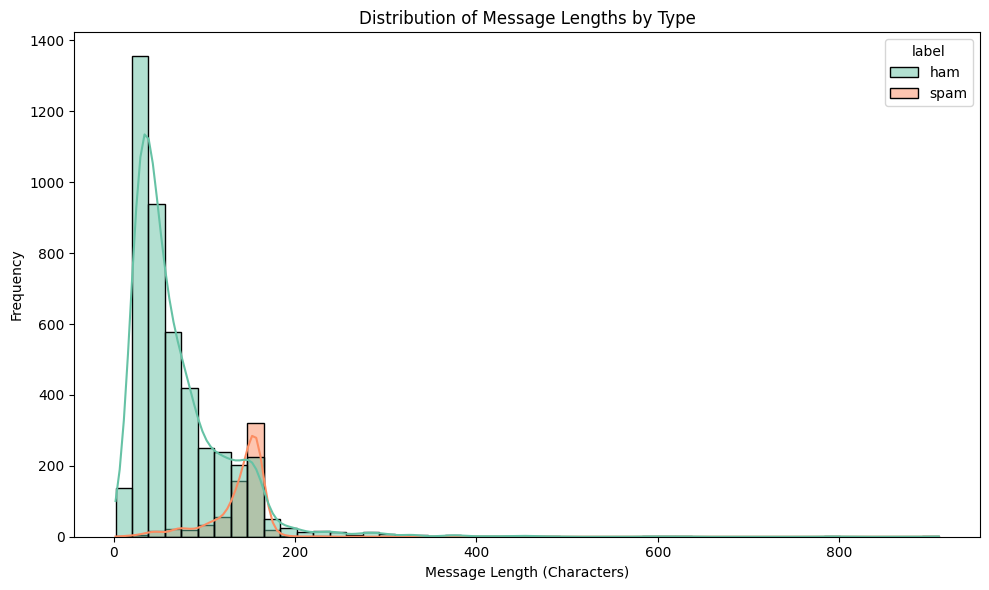

In [17]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='Set2')
plt.title("Distribution of Message Lengths by Type")
plt.xlabel("Message Length (Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("MessageLength_Distribution.png")
plt.show()

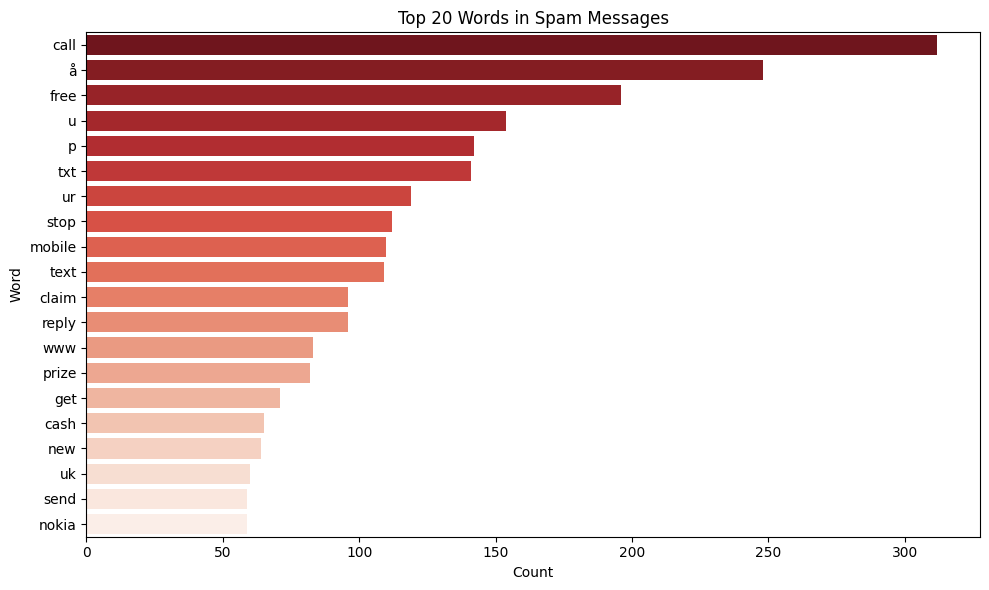

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=spam_df, x='count', y='word', hue='word', palette='Reds_r', legend=False)
plt.title("Top 20 Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.savefig("Top_Spam_Words.png")
plt.show()

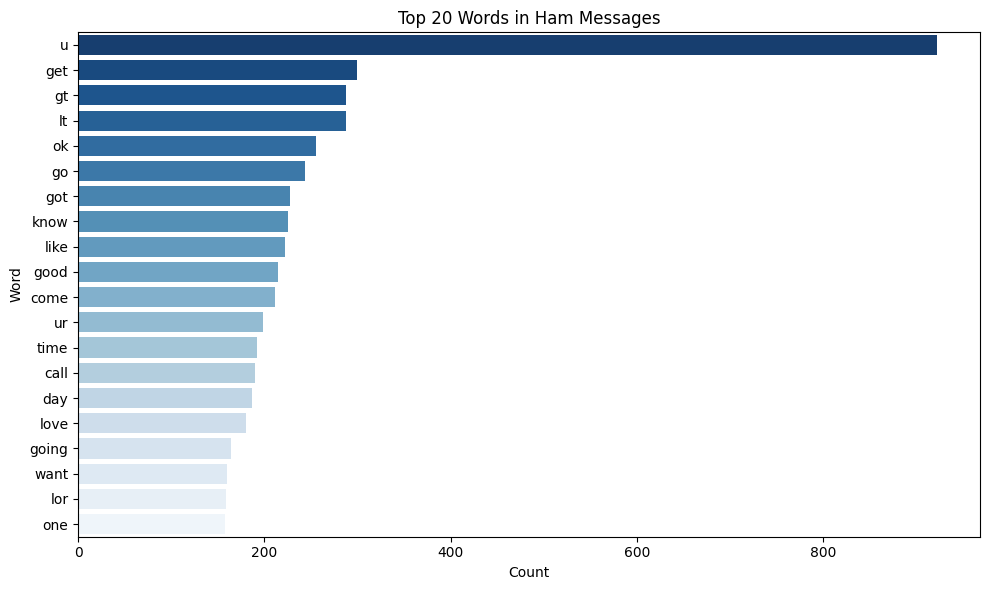

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=ham_df, x='count', y='word', hue='word', palette='Blues_r', legend=False)
plt.title("Top 20 Words in Ham Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.savefig("Top_Ham_Words.png")
plt.show()

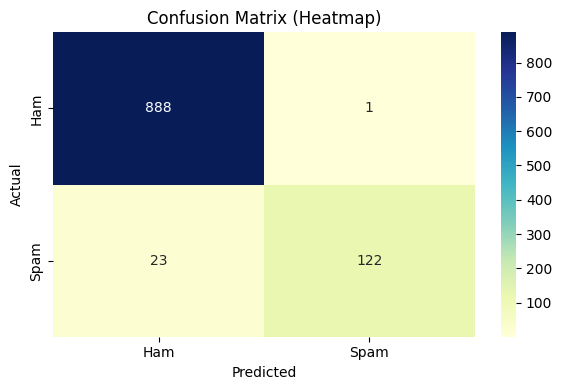

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Heatmap)")
plt.tight_layout()
plt.savefig("Confusion_Matrix_Heatmap.png")
plt.show()